In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

rawdata = pd.read_csv("DailyTemperatures.csv")
X = rawdata.drop(columns=["AvgTemperature", "Region", "Country", "City"])
y = rawdata["AvgTemperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
decision_tree = model.predict(X_test)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
linear = model.predict(X_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
random_forest = model.predict(X_test)


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
gradient = model.predict(X_test)

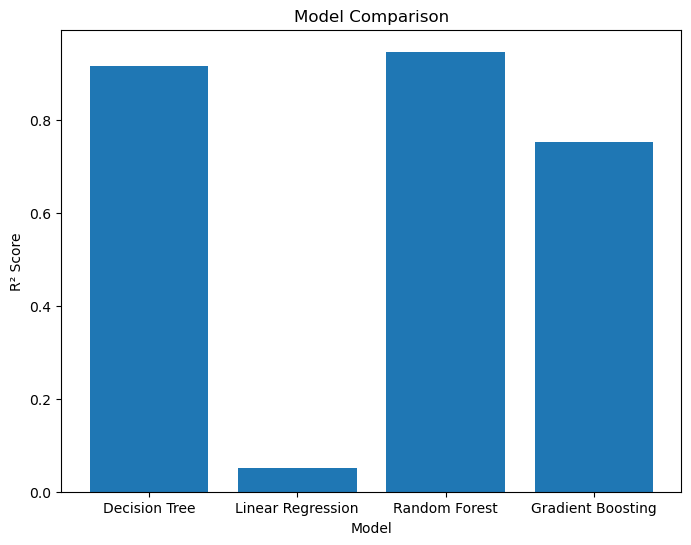

In [22]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Evaluate models on test data
decision_tree_r2 = r2_score(y_test, decision_tree)
linear_r2 = r2_score(y_test, linear)
random_forest_r2 = r2_score(y_test, random_forest)
gradient_r2 = r2_score(y_test, gradient)

# Create bar graph
models = ['Decision Tree', 'Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [decision_tree_r2, linear_r2, random_forest_r2, gradient_r2]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(models, r2_scores)
ax.set_title('Model Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('R² Score')

plt.show()


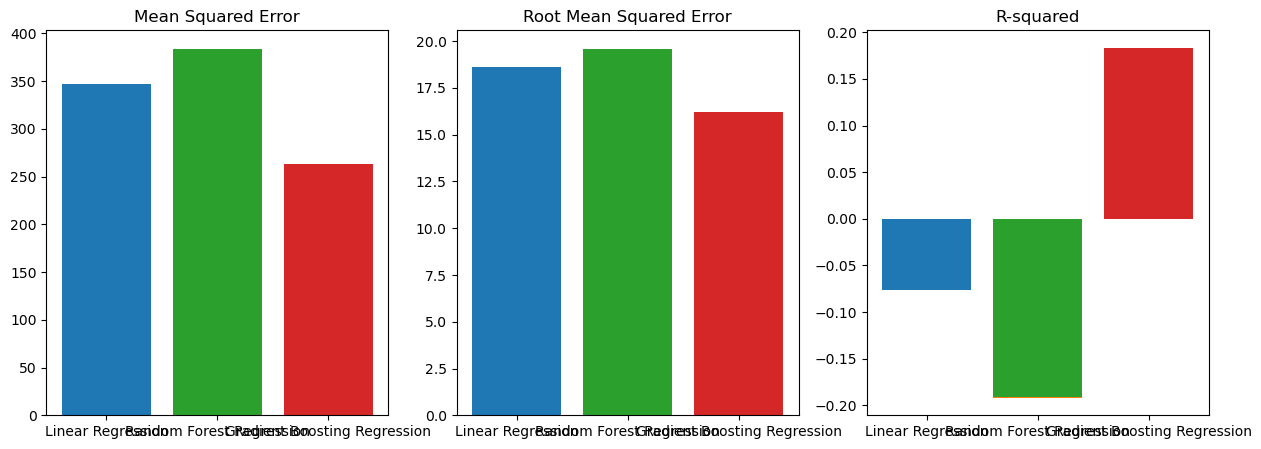

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
# Initialize the regression models
models = [('Linear Regression', LinearRegression()),
          ('Random Forest Regression', RandomForestRegressor()),
          ('Random Forest Regression', RandomForestRegressor()),
          ('Gradient Boosting Regression', GradientBoostingRegressor())]

# Plot the performance metrics for each model
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for name, model in models:
    # Make cross-validated predictions
    y_pred = cross_val_predict(model, X, y, cv=5)
    # Calculate the performance metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    # Plot the results
    ax[0].bar(name, mse)
    ax[0].set_title('Mean Squared Error')
    ax[1].bar(name, rmse)
    ax[1].set_title('Root Mean Squared Error')
    ax[2].bar(name, r2)
    ax[2].set_title('R-squared')
plt.show()